<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/eje_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Ejemplo examen ED

Nombre: Biología de sistemas

Fecha: 9 de diciembre


# Cargar Grind

In [ ]:
install.packages("deSolve")
install.packages("FME")
install.packages("rootSolve")

In [ ]:
source("Grind.R")

# Establecer modelo

In [2]:
model <- function(time, state, parms) {
  with(as.list(c(state, parms)), {

    dx <- s - p1*x*y
    dy <- p1*x*y - p2*y 

    return(list(c(dx,dy)))
  })
}

Establecer condiciones inciales, parámetros y tiempo de integración

In [20]:
s <- c(x = 0, y = 1)
p <- c(s = 1, p1 = 1, p2 = 1)
time <- seq(0, 20, 0.1)

#Análisis de estabilidad

## Obtener plano de fase

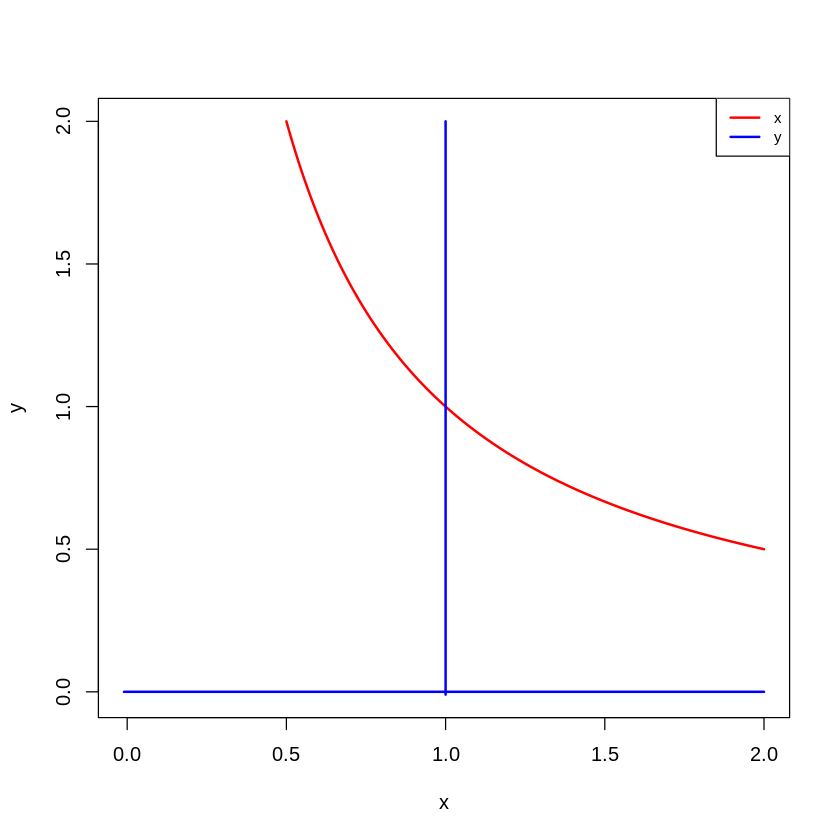

In [9]:
plane(xmax = 2, ymax = 2, xmin = -0.01, ymin = -0.01)

## Obtener puntos de equilibrio

x y 
1 1 
Stable point, eigenvalues:  -0.5+0.8660254i -0.5-0.8660254i 


x y 
1 1

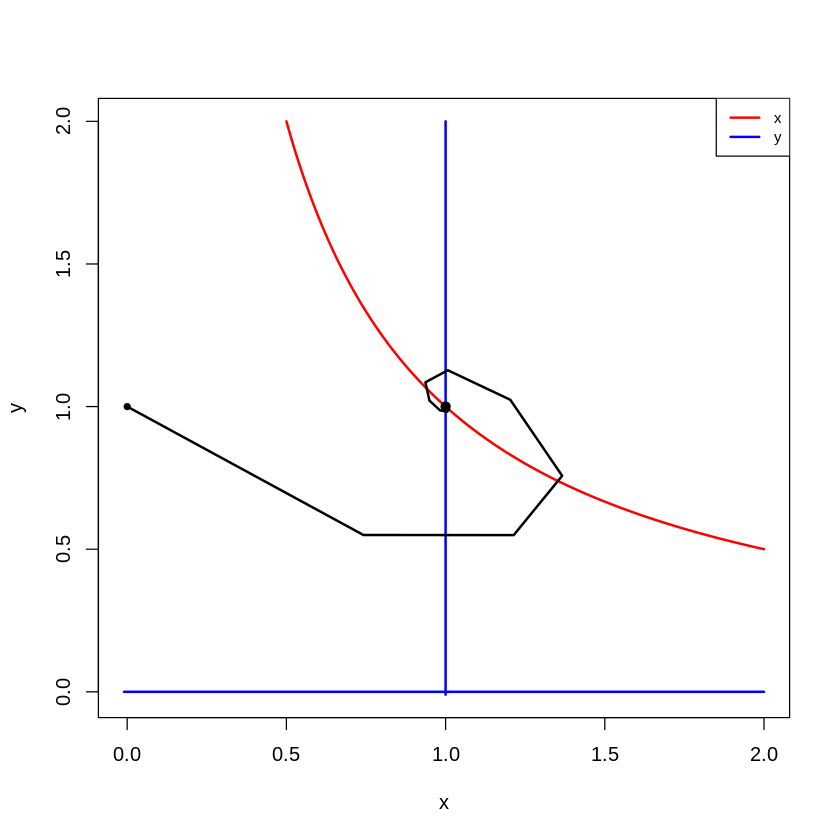

In [24]:
plane(xmax = 2, ymax = 2, xmin = -0.01, ymin = -0.01)
ss <- newton(state = s, plot = TRUE)
run(traject = TRUE)

Se obtuvo el punto de equilibrio ($x_{ss} = 1, y_{ss} = 1$). Además, dado que los eigenvalores son números complejos y la parte real es negativa se sabe que el punto de equilibrio es una espiral estable. 

No se espera observar bifurcaciones en este sistema ya que solo existe un punto de equilibrio, como se observa en el plano de fase. Independientemente del valor de los parámetros siempre existe solo un punto de equilibrio. 

# Análisis dinámico

## Resolver el modelo y mostrar el cambio de las variables en el tiempo

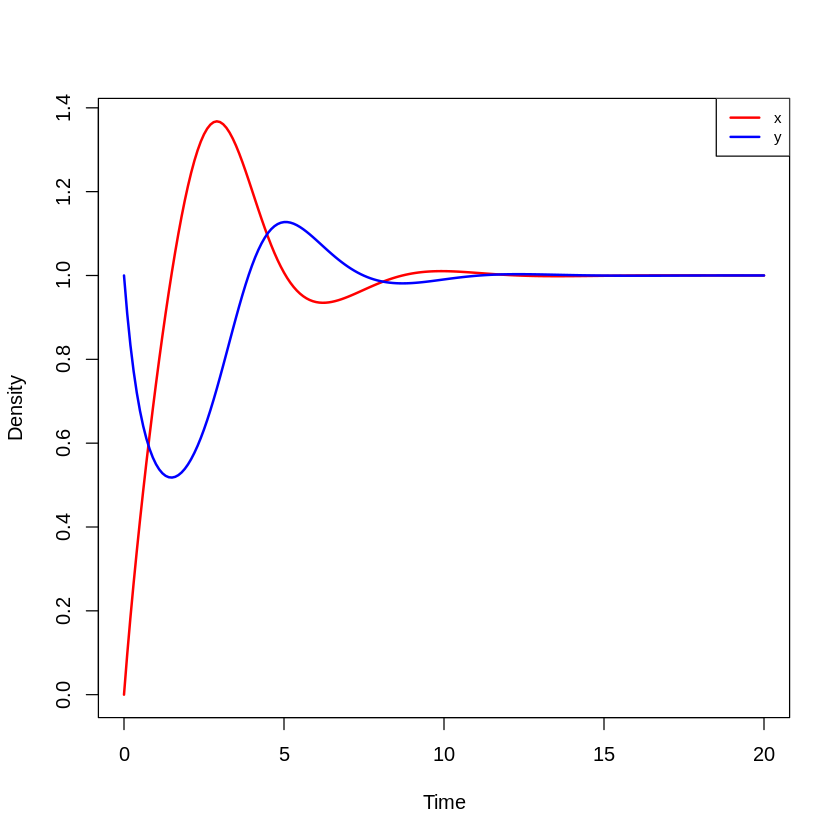

In [13]:
out <- run(tmax = 20, tstep = 0.1, state = s, parms = p, odes = model)

Esta figura es congruente con el plano de fase, donde se observó un solo punto de equilibrio en ($x_{ss} = 1, y_{ss} = 1$). Se aprecia también que en la fase de transición se presentan algunas oscilaciones, lo que concuerda con el tipo de punto de equilibrio que se obtuvo. 

Las condiciones iniciales ($x_{0} = 0, y_{0} = 1$), se escogieron de manera que fuera posible  observar las oscilaciones al inicio de la fase de transición. 

# Optimización de parámetros

## Datos experimentales 

s        p1        p2 
0.7197622 0.8849113 1.7793542

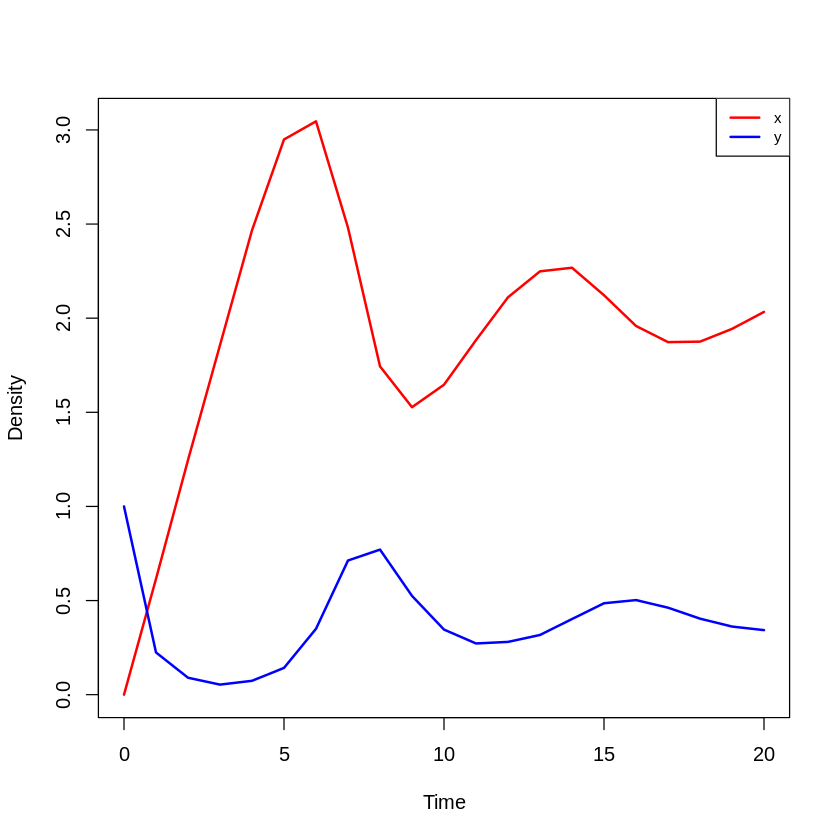

In [43]:
set.seed(123)
p_data <- p*abs(rnorm(3,1,0.5))
data <- run(tmax = 20, tstep = 1, state = s, parms = p_data, odes = model,
            after = "state <- state + rnorm(2,0,0.01)", table = TRUE)
p_data

No se tienen datos experimentales para el modelo propuesto, por lo que se generan haciendo uso del mismo modelo. Creamos un conjunto de parámetros que representarán el valor de los parámetros que describen mejor este conjunto de datos. Además, se utiliza el argumento *after* de la función *run()* para producir ruido en la simulación

## Probar varios parámetros y comparar resultado de la simulación con datos 

### Prueba 1

x         y 
0.9999721 1.0000758

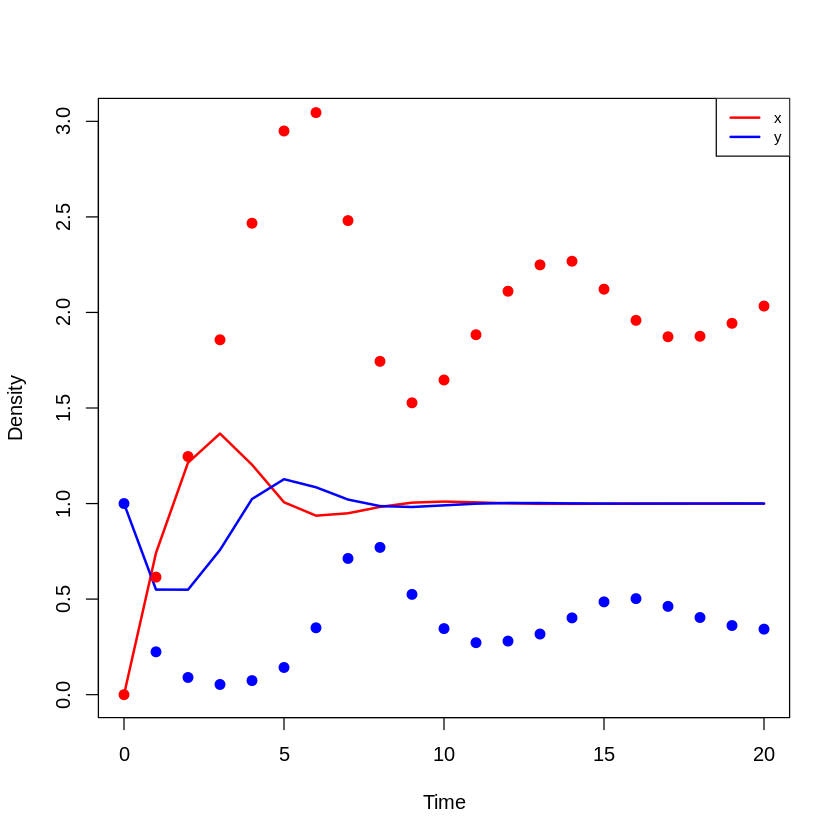

In [45]:
p1 <- c(s = 1,p1 = 1,p2 = 1)
run(parms = p1, tmax = 20, tstep = 1, ymax = 3)
matplot(data[,1], data[,2:3], add = T, pch = 20, lwd = 4, col = c("red","blue"))

Parece que nuestra primer estimación, $p1$, no se ajusta bien a los datos. Para poder tomar mejores decisiones vale la pena obtener los puntos de equilibrio y ver como estos dependen del valor de los parámetros.


---


$$Ceroclina\ de\ x:\hspace{2cm} s - p_{1}xy = 0\ $$ 

$$Ceroclina\ de\ y:\hspace{2cm} p_{1}xy - p_{2}y= 0\  $$ 



---

Resolviendo el sistema anterior se obtienen los puntos de equilibrio:

$$x_{ss} = \frac{p_{2}}{p_{1}} \hspace{1cm}  y_{ss} = \frac{s}{p2} $$

Vemos que para incrementar el valos de $x$ en el equilibrio y lograr un mejor ajuste a los datos, podemos incrementar el valor de $p_{2}$ y/o disminuir el valor de $p_{1}$. Mientras que para lograr disminuir el valor de $y$ en el equilibrio y mejorar el ajuste, podemos reducir el valor de $s$.  

### Prueba 2

x         y 
2.0478608 0.3877392

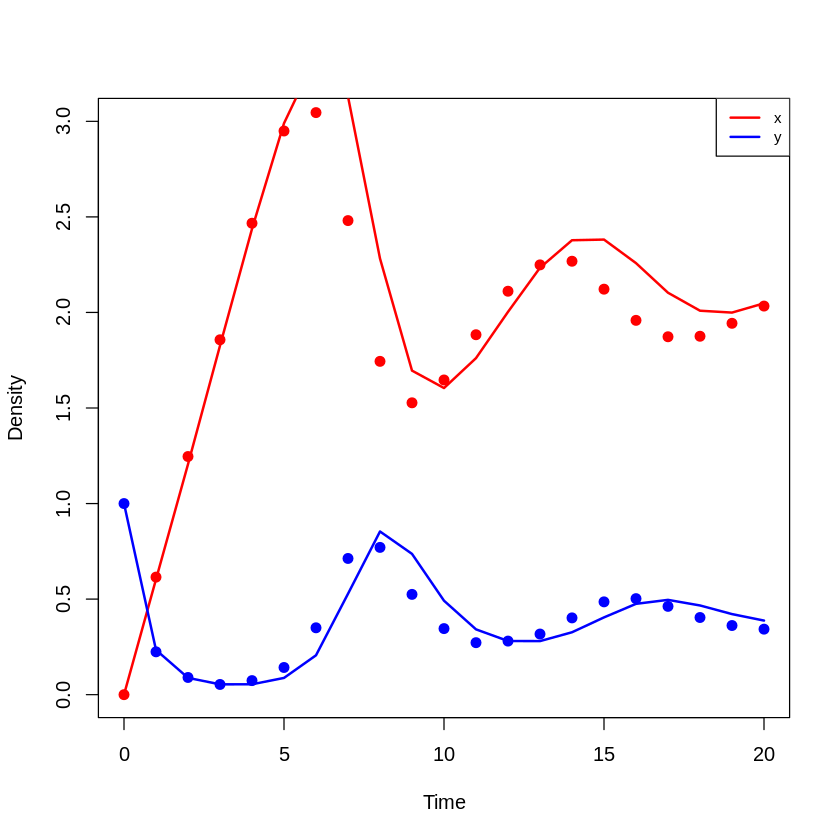

In [47]:
p2 <- c(s = 0.7,p1 = 0.8,p2 = 1.7)
run(parms = p2, tmax = 20, tstep = 1, ymax = 3)
matplot(data[,1], data[,2:3], add = T, pch = 20, lwd = 4, col = c("red","blue"))

Y podríamos continuar así, mejorando el ajuste con cada intento. 

## Realizar la optimización local

SSR: 0.006164892  Estimates:
        s        p1        p2 
0.9465108 0.9816571 1.1593081 


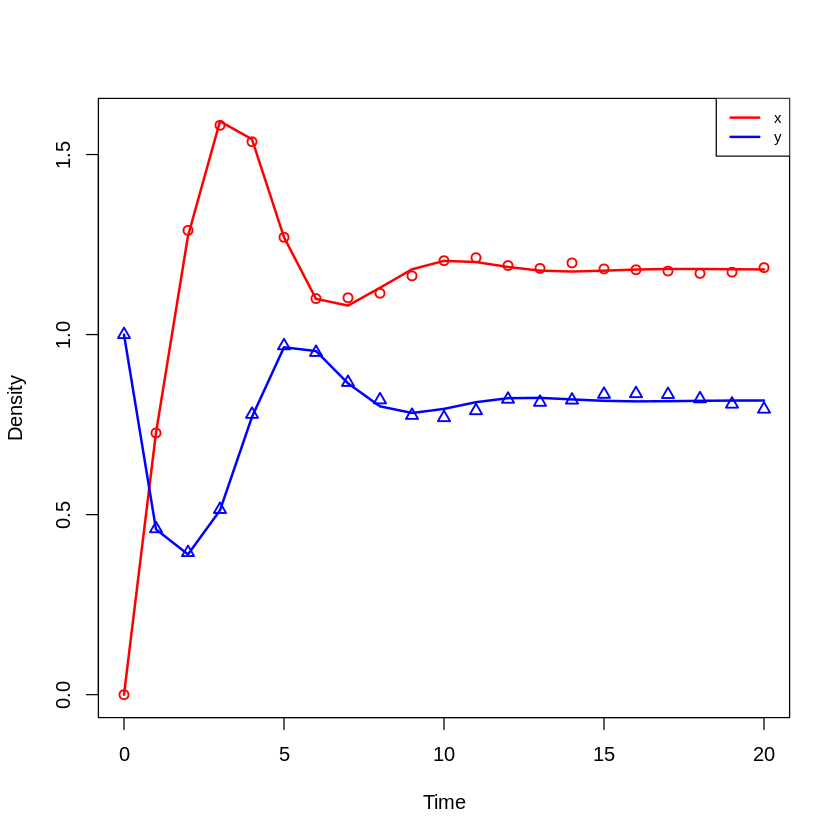

In [18]:
w <- names(p)
f <- fit(free = w)

In [23]:
cat("SSE: ", f$ssr,"\n")
cat("Valor real de los parámetros: ",p,"\n")
cat("Valor de los parámetros optimizados: ", f$par,"\n")

SSE:  0.006164892 
Valor real de los parámetros:  1 1 1 
Valor de los parámetros optimizados:  0.9465108 0.9816571 1.159308 


El error observado es bastante pequeño ya que el valor de los parámetros optimizados es bastante cercano al valor que se usó para generar los datos